Filters adalah suatu alat atau proses yang digunakan untuk mengubah sinyal input menjadi sinyal output yang diinginkan dengan cara memodifikasi karakteristik sinyal tersebut. Filter dapat digunakan untuk berbagai tujuan seperti mereduksi noise, memperjelas sinyal, atau menyoroti fitur-fitur tertentu dalam data. Filter dapat diterapkan dalam berbagai domain, termasuk pemrosesan audio, pemrosesan gambar, dan analisis data.

Sedangkan Windows dalam konteks analisis data, "window" atau jendela adalah fungsi matematis yang diterapkan pada serangkaian data untuk membaginya menjadi segmen-segmen yang lebih kecil. Jendela digunakan dalam teknik seperti analisis spektral, analisis deret waktu, dan pemrosesan sinyal lainnya. Penggunaan jendela memungkinkan untuk fokus pada bagian tertentu dari data atau sinyal, dan juga membantu dalam mereduksi efek dari ujung (atau tepian) data yang tidak lengkap.

Ketika filter dan jendela digunakan bersama-sama, mereka sering digunakan dalam konteks pemrosesan sinyal. Misalnya, dalam analisis spektral, seringkali digunakan filter untuk menghilangkan noise atau komponen frekuensi yang tidak diinginkan, sementara jendela digunakan untuk membagi sinyal menjadi segmen-segmen yang lebih kecil untuk dianalisis secara terpisah.

<ipython-input-1-3e1e699456ce>:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(-4, L+4, step=1), h, use_line_collection=True)


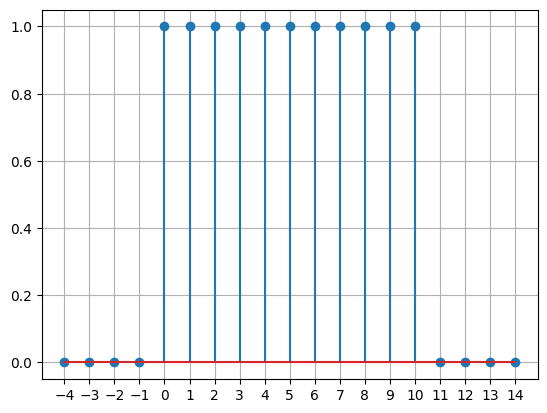

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L=11
h = np.concatenate((np.zeros(4),np.ones(L),np.zeros(4)),axis=0) # Membuat array 1D dengan nilai nol untuk 4 elemen pertama, nilai satu untuk L elemen berikutnya,
# dan nilai nol untuk 4 elemen terakhir, mewakili pulsa persegi panjang
plt.figure() # Membuat jendela figure baru untuk plot
plt.stem(np.arange(-4, L+4, step=1), h, use_line_collection=True) # Membuat plot stem menggunakan indeks waktu (-4 to L+3) dan nilai sinyal (h)
# use_line_collection=True memastikan garis penghubung antar penanda digambar
plt.xticks(np.arange(-4, L+4, step=1)) # Mengatur tanda centang pada sumbu x
plt.grid(); # Menambahkan garis bantu pada plot untuk keterbacaan yang lebih baik

Penjelasan hasil output :
Sumbu x mewakili indeks waktu, sedangkan sumbu y mewakili nilai sinyal.
•	Sumbu X (waktu): Sumbu x memiliki nilai dari -4 sampai 14, dengan tanda centang di setiap bilangan bulat, menunjukkan bahwa sinyal tersebut ditentukan untuk 19 indeks waktu, dari -4 sampai 14 (inklusif).
•	Sumbu Y (nilai sinyal): Sumbu y memiliki nilai dari 0 sampai 1, dengan tanda centang setiap selang 0.2, menunjukkan bahwa nilai sinyal dapat berkisar dari 0 hingga 1.
•	Batang : Terdapat 11 batang vertikal, masing-masing mewakili titik data dalam sinyal. Batang tersebut berada pada indeks waktu integer dari 0 sampai 10. Tinggi setiap batang adalah 1, menunjukkan bahwa nilai sinyal adalah 1 untuk indeks waktu tersebut. Sesuai dengan bentuk persegi panjang, di mana sinyal bernilai tinggi (1) selama durasi L (11 dalam kasus ini) dan nol (0) untuk sisa waktu.

interactive(children=(IntSlider(value=16, description='L', max=128, min=2), Checkbox(value=False, description=…

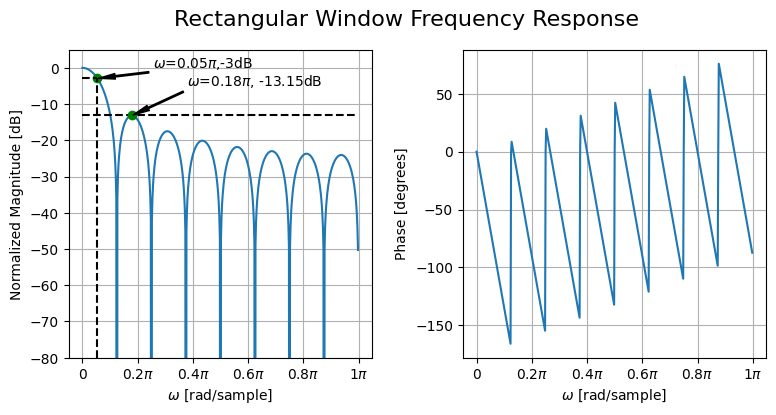

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib.ticker import FuncFormatter, MultipleLocator
from scipy.signal import argrelextrema
import scipy.signal as signal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
fig.suptitle('Rectangular Window Frequency Response', fontsize=16)
plt.subplots_adjust(wspace=0.3)

@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16),unwrap=False)
def plot_recWindow_H(L=16, unwrap=False):
    h = np.concatenate((np.ones(L),np.zeros(4)),axis=0)
    omega, H =signal.freqz(h[:-4],worN=512)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H)/np.abs(H).max())
    p3dB=np.max(H_dB)-3
    p3dBIndex= np.max(np.where(H_dB >= p3dB))
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    ax1.clear()
    ax1.plot(omega, H_dB)
    ax1.plot(wp, Hp,'go')
    ax1.plot((0, wp), (Hp, Hp), 'k--')
    ax1.plot((wp, wp), (-80, Hp), 'k--')
    ax1.set_ylim((-80,H_dB.max()+5))
    ax1.annotate(r'$\omega$={:.2f}$\pi$,-3dB'.format(wp/np.pi), xy=(wp, Hp), xytext=(wp+0.2*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H), np.greater)[0][0]
        ax1.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--')
        ax1.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]),
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(omega[side_lobe]+0.2*np.pi, -5),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax1.plot(omega[side_lobe], H_dB[side_lobe],'go')

    ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax1.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
    ax1.grid(True)
    ax1.set_xlabel(r'$\omega$ [rad/sample]')
    ax1.set_ylabel(r'Normalized Magnitude [dB]')


    ax2.clear()
    phase=np.angle(H,deg=True)
    if unwrap:
        phase=np.unwrap(phase)
    ax2.plot(omega,phase)
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
    ax2.grid(True)
    ax2.set_xlabel(r'$\omega$ [rad/sample]')
    ax2.set_ylabel(r'Phase [degrees]')

Di sini kita dapat melihat bahwa ini jauh dari impuls pada frekuensi nol. Malah agak lebar dan juga redamannya tidak terlalu tinggi, sekitar -15 hingga -20 dB. Kami berharap bahwa filter low pass yang kami hasilkan akan "mewarisi" sifat-sifat ini melalui konvolusi dalam domain frekuensi.

"Pass band" atau lebar lobus utama dari fungsi jendela kita akan menentukan lebar pita transisi dari filter yang dihasilkan, dan redaman stop band dari jendela akan menentukan redaman stop band yang dihasilkan dari filter kita.

Hal ini menunjukkan bahwa fungsi window membentuk karakteristik utama dari filter FIR yang kita hasilkan!

Penjelasan gambar hasil output :
1. Respon Magnitudo (Subplot Atas):
•	Sumbu x (ω) mewakili frekuensi dalam radian per sampel. Kisaran frekuensi dari 0 sampai π.
•	Sumbu y (Magnitudo Ternormalisasi [dB]) mewakili magnitudo respon frekuensi dalam desibel (dB).
•	Plot menunjukkan magnitudo dB (H_dB) dari jendela persegi panjang sebagai fungsi frekuensi.
•	Penanda hijau menunjukkan titik -3 dB, yaitu frekuensi di mana magnitudo turun 3 dB di bawah nilai maksimumnya.
•	Garis horizontal memanjang dari titik -3 dB ke sumbu x dan sumbu y, menunjukkan nilai frekuensi dan magnitudo yang sesuai.
•	Garis putus-putus digambar pada 0 ω dan frekuensi -3 dB, menekankan titik-titik penting ini.
•	Penanda merah (jika ada) menunjukkan potensi lobus samping, yang merupakan maksimum lokal dalam respon magnitudo yang terjadi jauh dari puncak utama.
•	Garis putus-putus ditarik dari lobus samping ke sumbu x dan sumbu y, menunjukkan nilai frekuensi dan magnitudo yang sesuai.

2. Respon Fase (Subplot Bawah):
•	Sumbu x (ω) mewakili frekuensi dalam radian per sampel. Kisaran frekuensi dari 0 sampai π.
•	Sumbu y (Fase [derajat]) mewakili fase respon frekuensi dalam derajat.
•	Plot menunjukkan fase (sudut) respon frekuensi (H) sebagai fungsi frekuensi.
•	Fase dimulai pada 0 derajat untuk frekuensi rendah dan kemudian berputar ke 360 derajat untuk frekuensi yang lebih tinggi.
•	Respon fase dapat memberikan informasi tentang perilaku sinyal di domain waktu.


In [30]:
from sympy import sin, symbols, simplify, pi, lambdify, limit

wc_s = symbols('\omega_c')
n_s, L_s = symbols('n L', integer=True)

n_d_s=(L_s-1)/2
h_n_s=sin(wc_s*(n_s-n_d_s))/(pi*(n_s-n_d_s))
h_n_s

sin(\omega_c*(-L/2 + n + 1/2))/(pi*(-L/2 + n + 1/2))

In [31]:
h_0_s = limit(h_n_s,n_s,n_d_s)
h_0_s

\omega_c/pi

interactive(children=(IntSlider(value=16, description='L', max=128, min=2), FloatSlider(value=0.5, description…

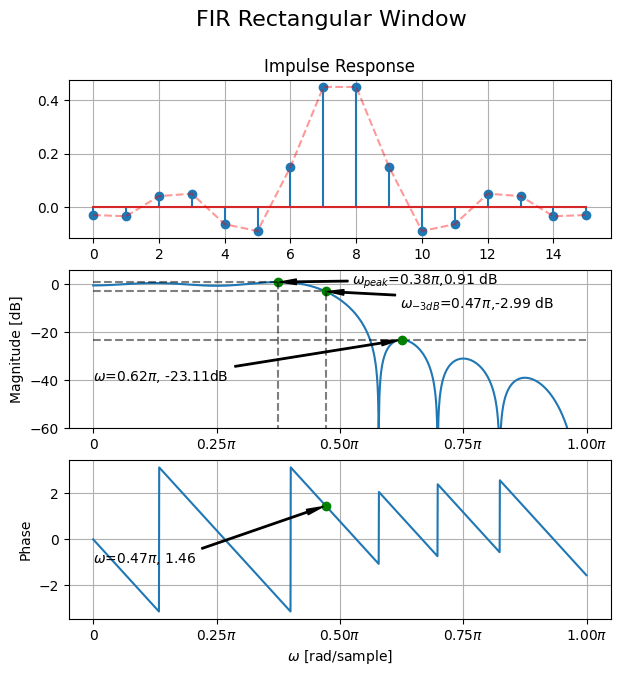

In [32]:
h_n=lambdify((wc_s,n_s,L_s), h_n_s, 'numpy')

fig1, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(7,7))
fig1.suptitle('FIR Rectangular Window', fontsize=16)
plt.subplots_adjust(wspace=0.3)


@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16),
          wc=widgets.FloatSlider(min=0.1, max=1, step=0.01, value=0.5), unwrap=False)
def plot_h(L=16, wc=0.5,unwrap=False):
    wc=wc*np.pi
    n=np.arange(L)
    n_d=n_d_s.subs(L_s,L).evalf()
    if L%2==0:
        h=h_n(wc,n,L)
    else:
        h=np.ones(L)
        for i in range(L):
            if i==n_d:
                h[i]=wc/np.pi
            else:
                h[i]=h_n(wc,i,L)
    ax1.clear()
    ax1.stem(h, use_line_collection=True)
    ax1.plot(h,'r--',alpha=0.4)
    ax1.set_title(r'Impulse Response')
    ax1.grid()

    omega, H =signal.freqz(h,worN=2048)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H))
    p3dB=-3
    p3dBIndex_down= np.max(np.where(H_dB >= p3dB))
    p3dBIndex_up= np.min(np.where(H_dB <= p3dB))
    print(H_dB[p3dBIndex_down])
    print(H_dB[p3dBIndex_up])
    if (np.abs(p3dB-H_dB[p3dBIndex_down]) >= np.abs(p3dB-H_dB[p3dBIndex_up])):
        p3dBIndex=p3dBIndex_up
    else:
        p3dBIndex=p3dBIndex_down
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    max_peak_ind=np.argmax(H_dB)

    ax2.clear()
    ax2.plot(omega, H_dB)
    ax2.plot(omega[max_peak_ind], H_dB[max_peak_ind],'go')
    ax2.plot((0, omega[max_peak_ind]), (H_dB[max_peak_ind], H_dB[max_peak_ind]), 'k--',alpha=0.5)
    ax2.plot((omega[max_peak_ind], omega[max_peak_ind]), (-80, H_dB[max_peak_ind]), 'k--',alpha=0.5)
    ax2.annotate('$\omega_{{peak}}$={:.2f}$\pi$,{:.2f} dB'.format(omega[max_peak_ind]/np.pi,H_dB[max_peak_ind]),
                 xy=(omega[max_peak_ind],H_dB[max_peak_ind]), xytext=(omega[max_peak_ind]+0.15*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4))
    ax2.plot(wp, Hp,'go')
    ax2.plot((0, wp), (Hp, Hp), 'k--', alpha=0.5)
    ax2.plot((wp, wp), (-80, Hp), 'k--',alpha=0.5)
    ax2.set_ylabel(r'Magnitude [dB]')
    ax2.grid()
    ax2.set_ylim((-60,H.max()+5))
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax2.annotate(r'$\omega_{{-3dB}}$={:.2f}$\pi$,{:.2f} dB'.format(wp/np.pi,Hp), xy=(wp, Hp), xytext=(wp+0.15*np.pi, -10),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H[p3dBIndex:]), np.greater)[0][0]+p3dBIndex
        ax2.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--',alpha=0.5)
        ax2.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]),
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(0, -40),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax2.plot(omega[side_lobe], H_dB[side_lobe],'go')

    ax3.clear()
    phase=np.angle(H, deg=False)
    if unwrap:
        phase=np.unwrap(phase)
        print('Delay={:.2f}'.format(phase[p3dBIndex]/wp))
    ax3.plot(omega,phase)
    ax3.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax3.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax3.grid(True)
    ax3.set_xlabel(r'$\omega$ [rad/sample]')
    ax3.set_ylabel(r'Phase')
    ax3.plot(wp, phase[p3dBIndex],'go')
    ax3.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}'.format(wp/np.pi,phase[p3dBIndex]),
                     xy=(wp, phase[p3dBIndex]), xytext=(0, -1),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)

Sekarang, asumsikan jika ingin memiliki panjang filter L=16. Maka delay untuk membuat filter yang dihasilkan menjadi kausal adalah nd = (L-1)2 = 7,5. Oleh karena itu filter menjadi:

h(n)=sin(ωc(n-7.5))π(n-7.5) untuk n = 0,...,15.
Ini adalah filter FIR kausal yang dihasilkan dengan fungsi jendela persegi panjang.

Pita lolos memiliki riak sekitar +/- 0,5 dB. 0.5 dB sesuai dengan faktor 100.520≈1.06 yang berarti hanya 6% kelebihan atau kekurangan pemotretan, dan biasanya tidak masalah.

Namun, di sini juga dapat melihat bahwa filter ini mungkin memiliki redaman -10 dB pada frekuensi yang dinormalisasi 0,5⋅π dan lobus sisi pertama hanya memiliki redaman sekitar -20 dB. Oleh karena itu, filter ini tidak memenuhi atau memenuhi persyaratan setidaknya -60 dB redaman mulai dari frekuensi normal 0,5⋅π.

Untuk plot fase: memiliki delay nd = 7,5 dengan filter ini. Karena ini adalah apa yang disebut filter fase linier, kita mengharapkan fase menjadi -7,5⋅ω. Kita dapat memverifikasi hal ini dalam plot kita, misalnya pada frekuensi ω = 0.1⋅π dalam plot kami pada sumbu x 0,1. Dalam Derajat kita memperoleh 7,5⋅0,1⋅π⋅180π=135


Kode dibawah ini untuk menghitung respon frekuensi jendela persegi panjang dan kemudian memplot magnitudonya dalam desibel (dB) vs frekuensi ternormalisasi. Plot ini membantu memvisualisasikan bagaimana jendela persegi panjang memengaruhi komponen frekuensi yang berbeda dari suatu sinyal.

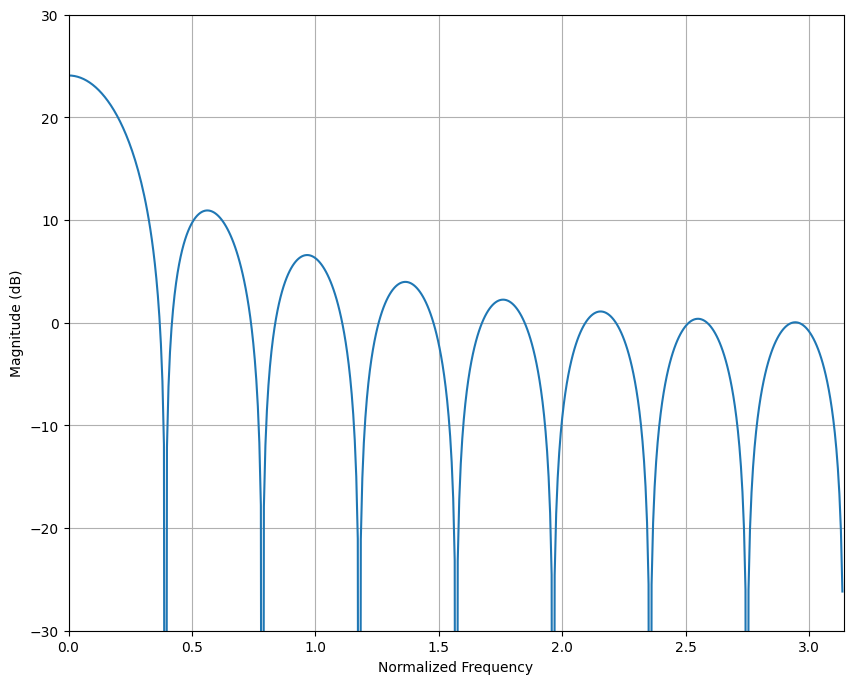

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

h=np.ones(16);
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.axis([0, 3.14, -30, 30])
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.grid()

Kode berikut untuk menghitung error antara respon frekuensi dari filter FIR (Finite Impulse Response) yang diberikan (h) dan respon frekuensi yang diinginkan (H_desired). Kode tersebut bergantung pada pustaka numpy (sebagai np) dan scipy.signal (sebagai signal) untuk mengakses fungsi-fungsi pemrosesan sinyal.

In [ ]:
import numpy as np
import scipy.signal as signal

def errfunc(h):
    numfreqsamples=512

    #desired passband:
    pb=int(numfreqsamples/4.0)
    #desired transition band:
    tb=int(numfreqsamples/8.0)

    w, H = signal.freqz(h,1,numfreqsamples)
    H_desired=np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb)))
    weights = np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb)))
    err = np.sum(np.abs(H-H_desired)*weights)
    return err

Kode berikut menghasilkan dua plot untuk memvisualisasikan karakteristik dari respon frekuensi yang diinginkan (H_desired) dan berat (weights) yang akan digunakan dalam analisis filter:
Plot Respon Frekuensi yang Diinginkan (H_desired) : Menunjukkan transisi dari passband (nilai satu) ke transition band (nilai nol) dalam sebuah filter. Digunakan np.concatenate untuk menggabungkan array yang berisi nilai satu untuk passband dan nilai nol untuk transition band. Grafik ini membantu memahami zona passband dan transition band yang diinginkan dalam filter.
Plot Berat (weights) : Menggambarkan berat yang akan diterapkan pada berbagai bagian dari respon frekuensi yang diinginkan. Terdiri dari nilai satu untuk passband, nilai nol untuk transition band, dan berat tinggi (1000) di luar passband dan transition band. Grafik ini memberikan gambaran tentang bagaimana berat diterapkan pada evaluasi filter, dengan penekanan khusus pada daerah di luar passband dan transition band.


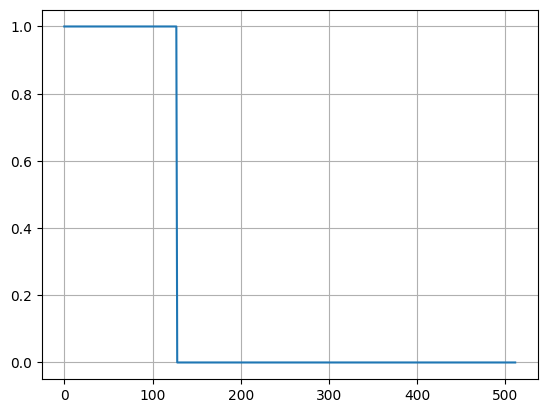

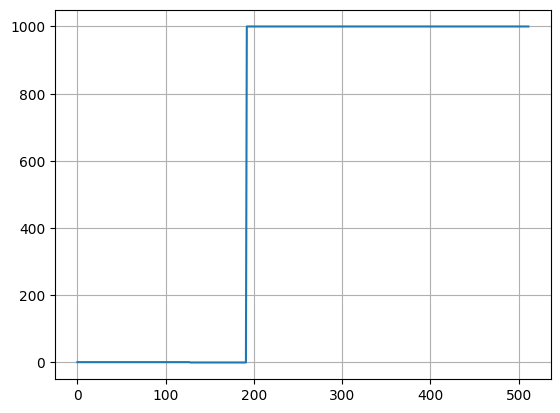

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

numfreqsamples=512

#desired passband:
pb=int(numfreqsamples/4.0)
#desired transition band:
tb=int(numfreqsamples/8.0)

# See H_Desired
plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb))))
plt.grid()

plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb))))
plt.grid()

In [ ]:
# Kode ini mengoptimalkan fungsi errfunc yang ditentukan pengguna menggunakan tebakan awal acak
# kemudian mencetak vektor solusi yang meminimalkan fungsi tersebut.
import scipy.optimize as opt

minout=opt.minimize(errfunc,np.random.rand(16))
h=minout.x
print(h)

[-0.00051353 -0.00289617 -0.00926846 -0.02161141 -0.04020766 -0.06241974
 -0.08283325 -0.09526482 -0.09551323 -0.08350397 -0.06328355 -0.04101329
 -0.0221899  -0.00958737 -0.0030161  -0.0005444 ]


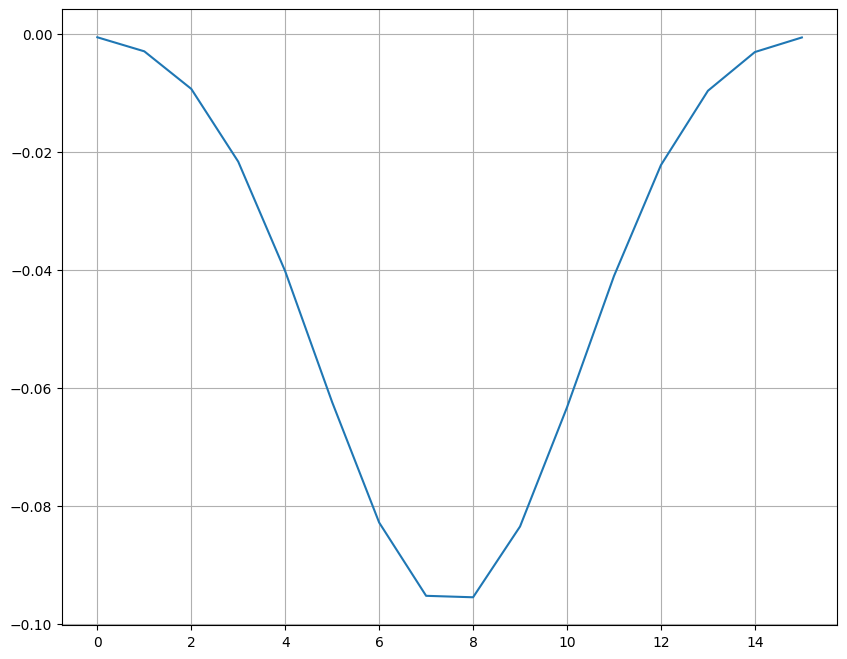

In [ ]:
# Sehingga mendapatkan sampel atau respons impuls sebagai berikut :
plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Tanda negatif tidak menjadi masalah, karena hanya mengoptimalkan besarannya. Besarnya respons frekuensinya adalah

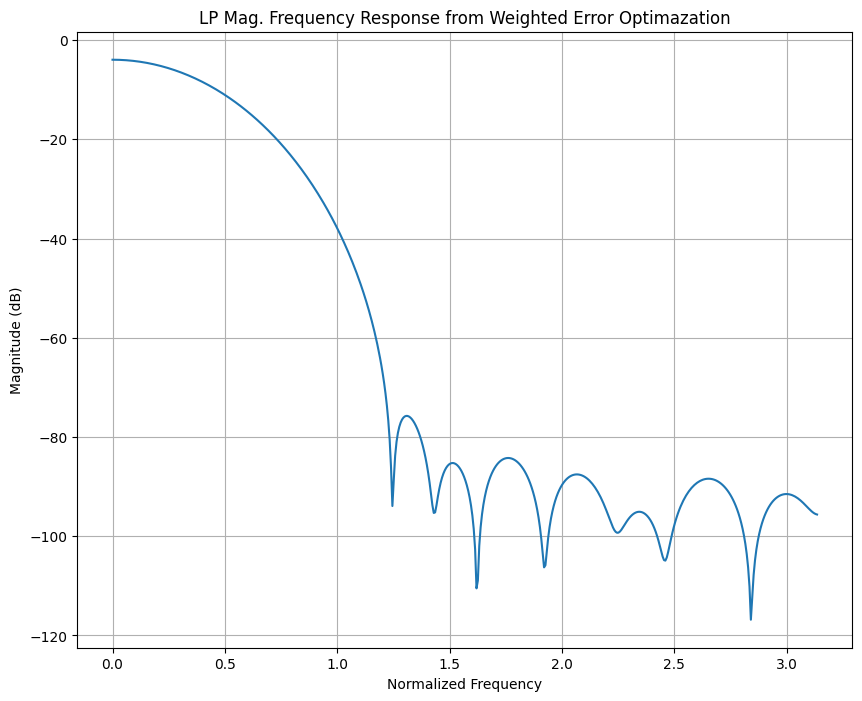

In [ ]:
# Kode berikut untuk menghitung respon frekuensi filter dan kemudian memplot magnitudonya dalam desibel (dB) vs frekuensi ternormalisasi.
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.title('LP Mag. Frequency Response from Weighted Error Optimazation')
plt.grid()

Kode berikut ini untuk membuat dan memvisualisasikan sinyal jendela persegi panjang dengan modifikasi menggunakan fungsi kosinus. Sinyalnya memiliki bentuk jendela persegi panjang dengan gelombang sinusoidal di bagian tengahnya. Modifikasi ini dapat digunakan untuk mengubah karakteristik frekuensi sinyal.

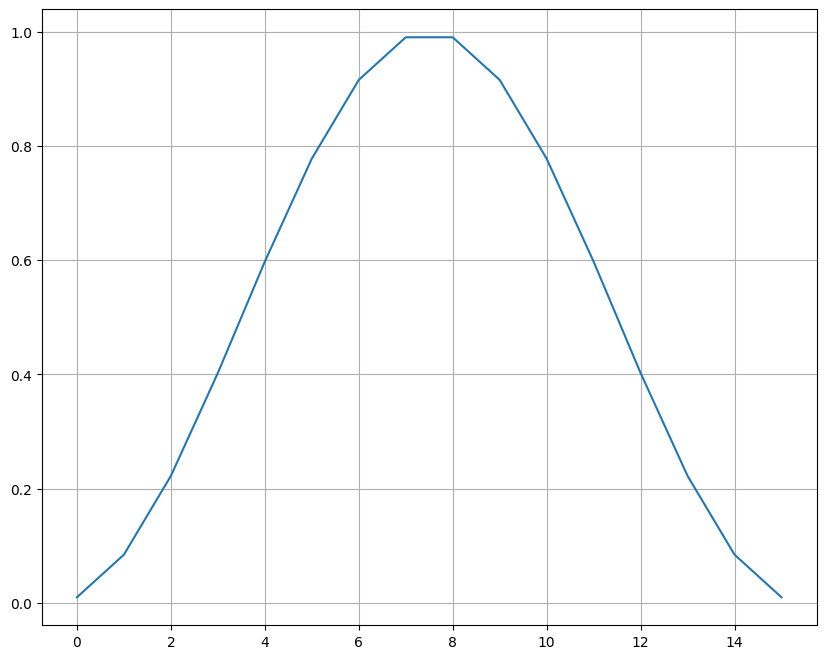

In [ ]:
h=0.5-0.5*np.cos(2*np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Gambar tersebut menunjukkan plot dari sinyal h yang dibuat oleh kode. Sinyalnya adalah jendela persegi panjang dengan modifikasi menggunakan fungsi kosinus.
Sumbu X: Menunjukkan indeks sinyal (dari 0 hingga 15).
Sumbu Y: Menunjukkan nilai sinyal pada setiap indeks.
Bentuk Sinyal: Sinyalnya dimulai dari 0, kemudian naik secara bertahap hingga mencapai nilai maksimum 1, lalu turun secara bertahap kembali ke 0. Bagian tengah sinyal dimodifikasi dengan gelombang sinusoidal.

Respon frekuensinya diperoleh dengan freqz berikut :

In [ ]:
def freqz(x):
    # get frequency bins and according magnitude values
    f, H = signal.freqz(x)

    #normalized frequency
    fNorm = f/np.pi

    # magnitude in dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!

    # open figure
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,3.14,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'b')
    plt.axis([0,3.14,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

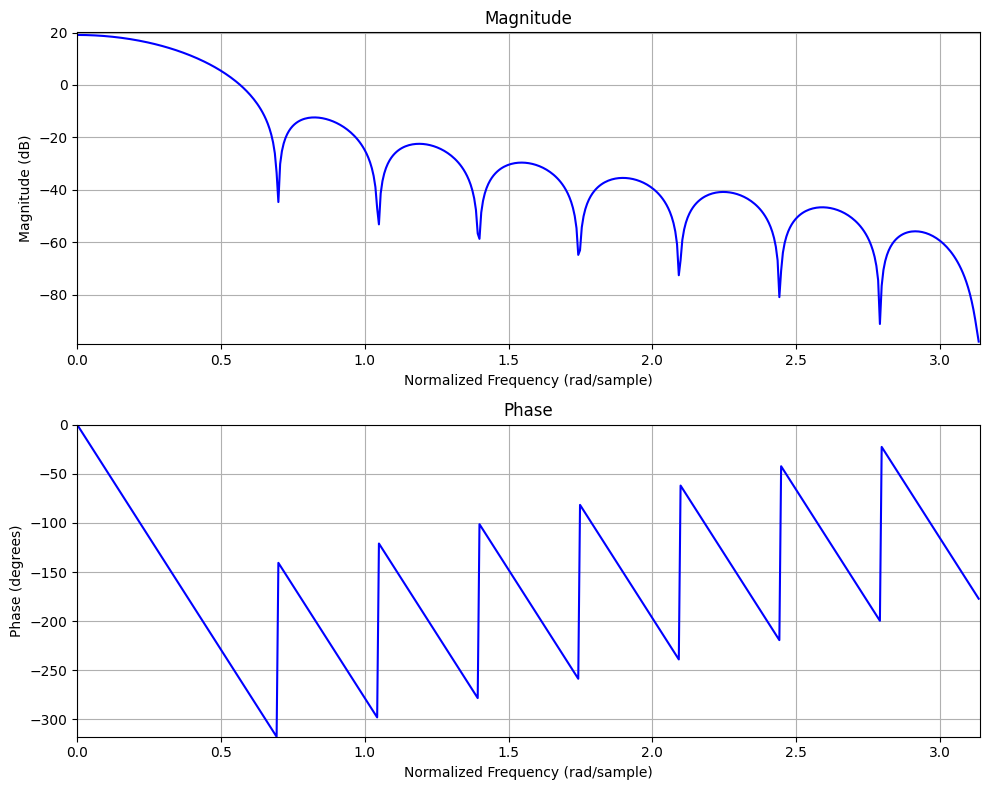

In [21]:
freqz(h)

Di sini kita dapat melihat bahwa kita juga mendapatkan redaman yang jauh lebih tinggi (dibandingkan dengan fungsi persegi panjang) untuk side lobe pertama, yaitu lebih dari -35 dB (diukur dari maksimum main lobe, pass band), dan jauh di stop band, kita mendapatkan redaman sekitar -60 dB!

Namun dengan mengorbankan main lobe yang lebih lebar (lebar 3dB sekitar 0,1π dua kali lebih lebar daripada jendela persegi panjang), yang mengarah ke pita transisi yang lebih lebar.

Hal ini menunjukkan pertukaran yang umum: Kita dapat menukar lebar transisi dengan stop-band attenuation.

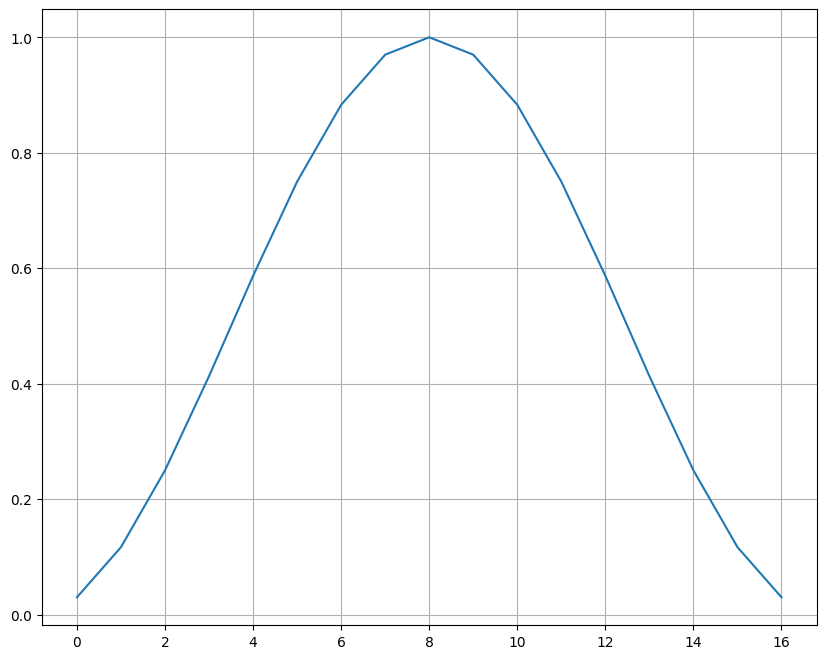

In [20]:
# Contoh untuk L=17 (jumlah sampel respons impuls, sama dengan koefisien, karena ini mewakili filter FIR):
h=0.5-0.5*np.cos(2*np.pi/18*(np.arange(17)+1))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

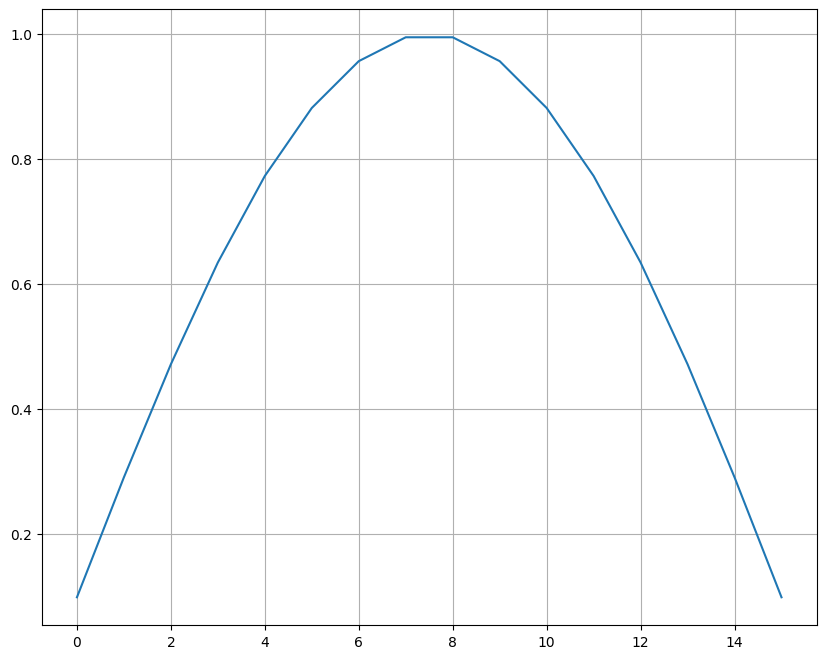

In [ ]:
# Contoh untuk L=16:
s=np.sin(np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(s)
plt.grid()

Penjelasan plot :
Sumbu X: Mewakili indeks sampel (dari 0 sampai 15).
Sumbu Y: Mewakili nilai amplitudo gelombang sinus pada setiap indeks sampel.
Bentuk Gelombang: Sinyal ini adalah kurva halus yang berosilasi, dimulai dari nol, mencapai puncak positif, kembali ke nol, mencapai puncak negatif, dan kemudian kembali ke nol. Periode gelombang adalah 16 sampel, sesuai dengan frekuensi angular np.pi / 16.

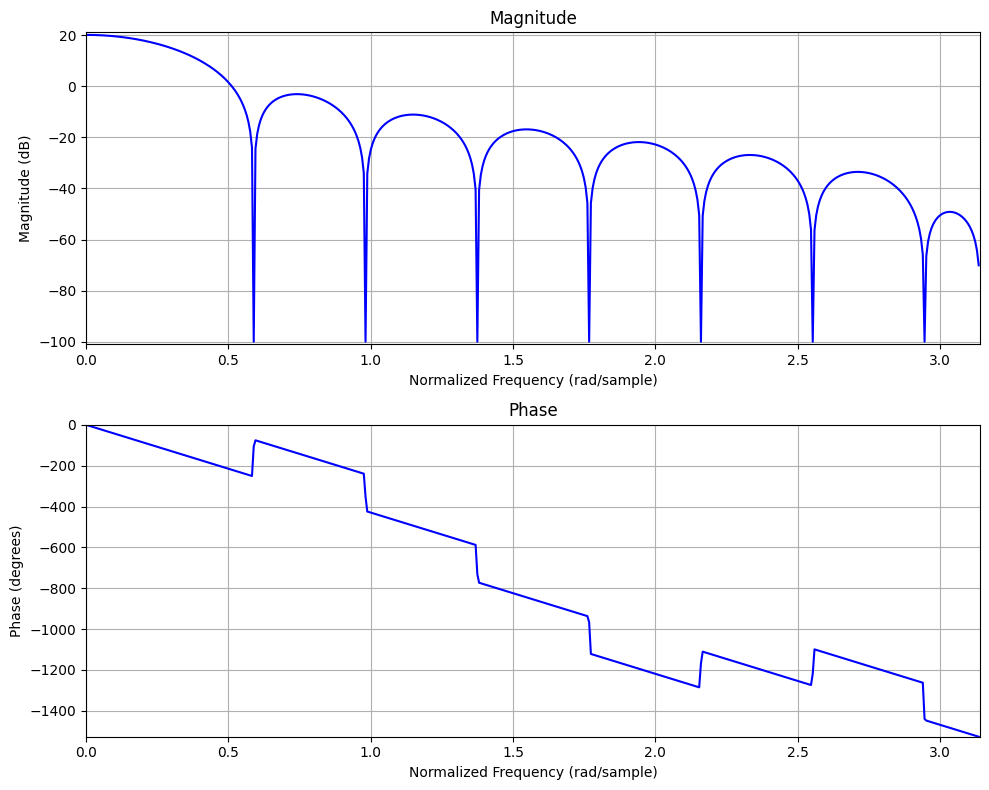

In [ ]:
# Respon frekuensinya adalah:
freqz(s)

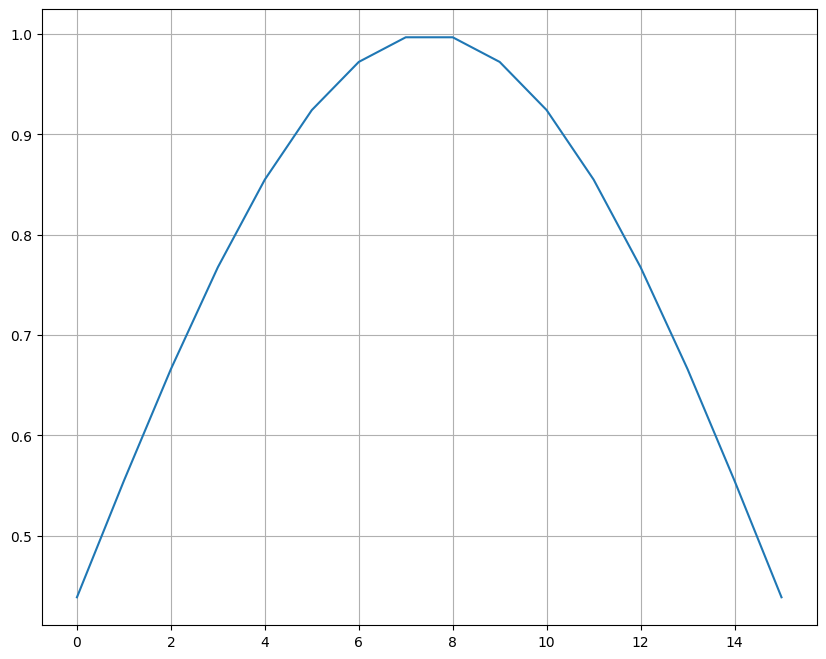

In [22]:
# Kaiser Window
# contoh untuk L=16 dan β=2

hk=np.kaiser(16,2)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

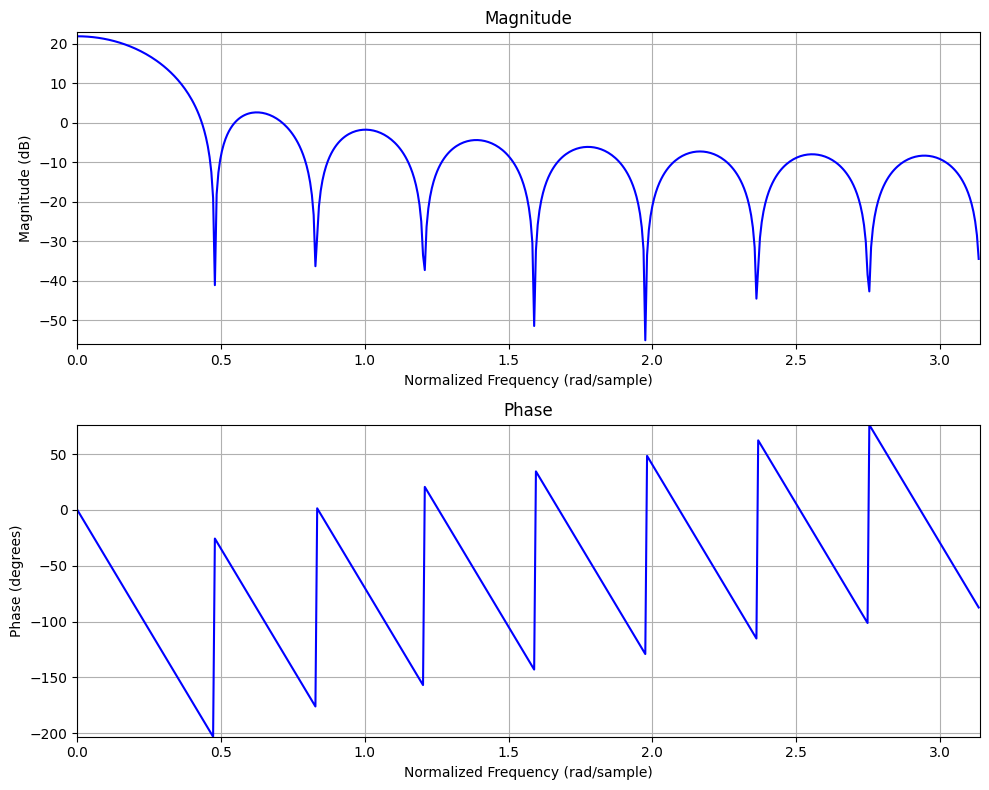

In [23]:
# # Diperoleh respons frekuensinya dengan:
freqz(hk)

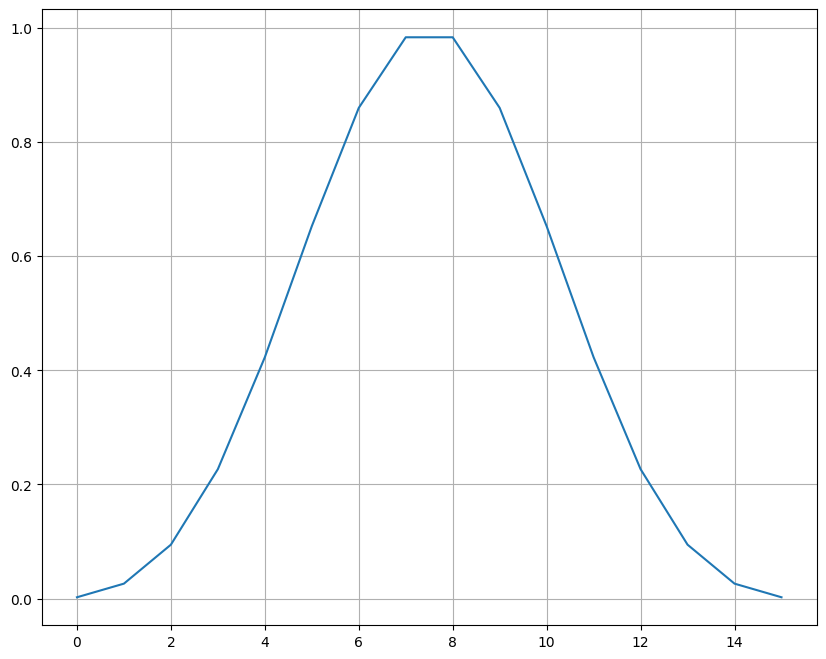

In [24]:
# untuk β=8
hk=np.kaiser(16,8)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

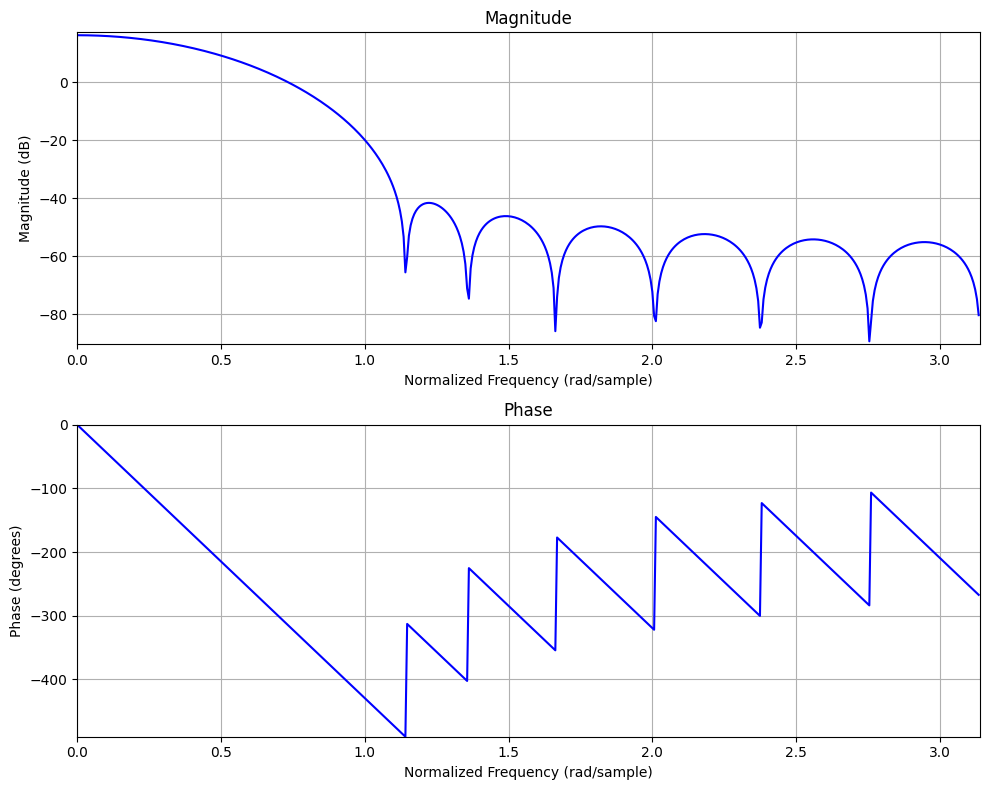

In [25]:
# Diperoleh respons frekuensinya dengan:
freqz(hk)